# GARCH

The GARCH model is the generalised ARCH model is used to predict volatility. The equation of the GARCH model is:

$$ \sigma_{t+1} ^ 2 = \alpha_0 + \alpha_1 * r_t ^2 + \beta_1 * \sigma_{t} ^ 2 $$

where: 
* $\sigma_{t+1} ^ 2$ is the ARCH predicted variance,
* $r_{t} ^ 2$ is the current period returns,
* $\alpha_0$ is a constant,
* $\alpha_1$ is the autoregressive coefficient and
* $\beta_1$ is the conditional regression coefficient.

The GARCH model in Python is implemented using the `arch_model` function. The syntax is shown below.

Syntax: 
```python
arch_model(historical_data, vol='GARCH', p=AR_order, q=MA_order, dist=distribution_of_the_data)
```
1. `historical_data`: Historical data whose volatility is to be predicted
1. `vol='GARCH'`: Type of model to use
1. `AR_order`: The AR order (p) of the GARCH(p,q) model
1. `MA_order`: The MA order (q) of the GARCH(p,q) model
1. `distribution_of_the_data`: distribution of the input data. Empirically, for most financial data, this is Skewed Student’s-t distribution or 'skewt'

In [ ]:
!pip install arch

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

import yfinance as yf
from arch import arch_model  # Import arch library

In [ ]:
# Download Nifty 50 historical data
data = yf.download('^NSEI', start='2015-1-1', end='2020-12-31')

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Compute daily log returns
data['log_returns'] = np.log(data['Adj Close'].pct_change() + 1) * 100

In [ ]:
# Compute rolling 14-day annualized volatility
data['rolling_annualized_vol'] = data['log_returns'].rolling(14).std() * (252 ** 0.5)

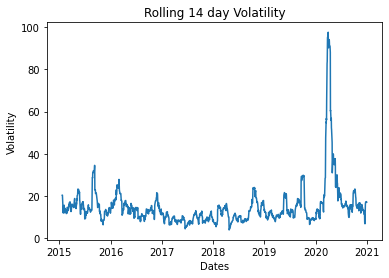

In [ ]:
# Plot volatility
plt.plot(data['rolling_annualized_vol'])
plt.title('Rolling 14 day Volatility')
plt.xlabel('Dates')
plt.ylabel('Volatility')
plt.show()

In [ ]:
# Define a function that models volatility and forecasts it
def predict_volatility(hist_data):
    
    # Define garch model
    garch_model = arch_model(hist_data, vol='GARCH', p=1, q=1, dist='skewt')
    
    # Train garch model
    garch_model = garch_model.fit(disp='off')
    
    # Forecast variance
    forecasted_daily_variance = garch_model.forecast(horizon=1).variance.values[-1]
    
    # Convert variance to standard deviation
    forecasted_daily_volatility = forecasted_daily_variance ** 0.5
    
    # Compute annualized volatility
    annualized_volatility = forecasted_daily_volatility * (252**0.5)
    
    return annualized_volatility

In [ ]:
# Predict rolling volatility
data['predicted_volatility'] = data['log_returns'].rolling(252).apply(predict_volatility)

data['predicted_volatility'] = data['predicted_volatility'].shift(1)

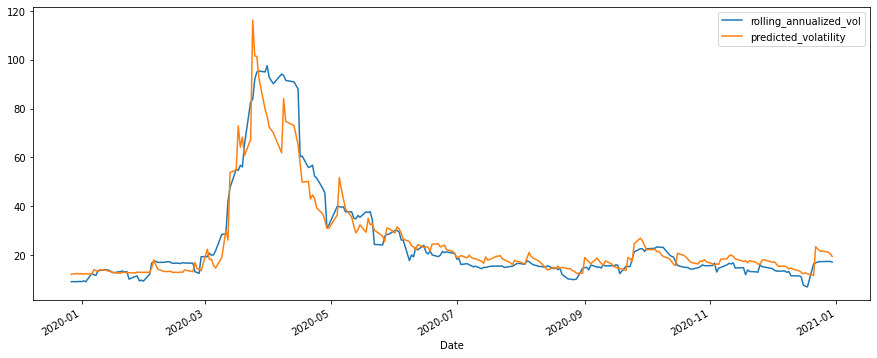

In [ ]:
# Plot predicted volatility
data[['rolling_annualized_vol', 'predicted_volatility']].dropna()[-252:].plot(figsize=(15, 6))

### Forecast for the next 5 days

In [ ]:
# Define garch model
garch_model = arch_model(data['log_returns'].iloc[-252:], vol='GARCH', p=1, q=1, dist='skewt')

# Train garch model
garch_model = garch_model.fit(disp='off')

In [ ]:
# Forecast volatility
forecasted_daily_variance = garch_model.forecast(horizon=5).variance.values[-1]

/usr/local/lib/python3.8/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [ ]:
forecasted_daily_volatility = forecasted_daily_variance ** 0.5

In [ ]:
annualized_volatility = forecasted_daily_volatility * (252**0.5)

In [ ]:
annualized_volatility

array([18.40604451, 18.71563585, 19.01709227, 19.31082599, 19.59721476])

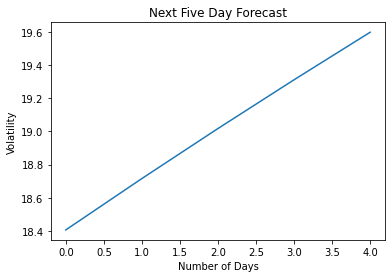

In [ ]:
plt.plot(annualized_volatility)
plt.title('Next Five Day Forecast')
plt.xlabel('Number of Days')
plt.ylabel('Volatility')
plt.show()